# Post Pruning of Decision Tree with Cost Complexity
  

In this notebook I used breast cancer dataset that is available in sklearn library.<br>
I will be be performing post pruning by finding cost complexity alpha to which our test data shows maximum accuracy. 
 <br>
steps to be followed are:


1.   Get cost colmplexity alphas of subtree during pruning.
2.   Make a list of clasiifiers by using all these ccp alphas obtained in the first step.
3.  Make a list of accuracy scores for both training and test data with the help of duifferent classifiers obtained in step 2.
4.  Then find the ccp alpha for which test data gives maximum effeciency.
5.  Use this ccp alpha for further predictions





In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn
import numpy as np

In [ ]:
X,y=load_breast_cancer(return_X_y=True)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=0)



In [ ]:
dtclf=DecisionTreeClassifier(random_state=0)
dtclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred=dtclf.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8947368421052632

[Text(456.54545454545456, 509.625, 'X[7] <= 0.049\ngini = 0.47\nsamples = 341\nvalue = [129, 212]'),
 Text(329.72727272727275, 441.675, 'X[3] <= 995.5\ngini = 0.058\nsamples = 201\nvalue = [6, 195]'),
 Text(279.0, 373.725, 'X[25] <= 0.451\ngini = 0.049\nsamples = 200\nvalue = [5, 195]'),
 Text(228.27272727272728, 305.775, 'X[14] <= 0.003\ngini = 0.039\nsamples = 199\nvalue = [4, 195]'),
 Text(101.45454545454545, 237.825, 'X[1] <= 19.9\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(50.72727272727273, 169.875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(152.1818181818182, 169.875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(355.09090909090907, 237.825, 'X[13] <= 46.315\ngini = 0.021\nsamples = 191\nvalue = [2, 189]'),
 Text(253.63636363636363, 169.875, 'X[21] <= 32.78\ngini = 0.011\nsamples = 188\nvalue = [1, 187]'),
 Text(202.9090909090909, 101.92500000000001, 'gini = 0.0\nsamples = 171\nvalue = [0, 171]'),
 Text(304.3636363636364, 101.92500000000001, 'X[21] <= 33.805\n

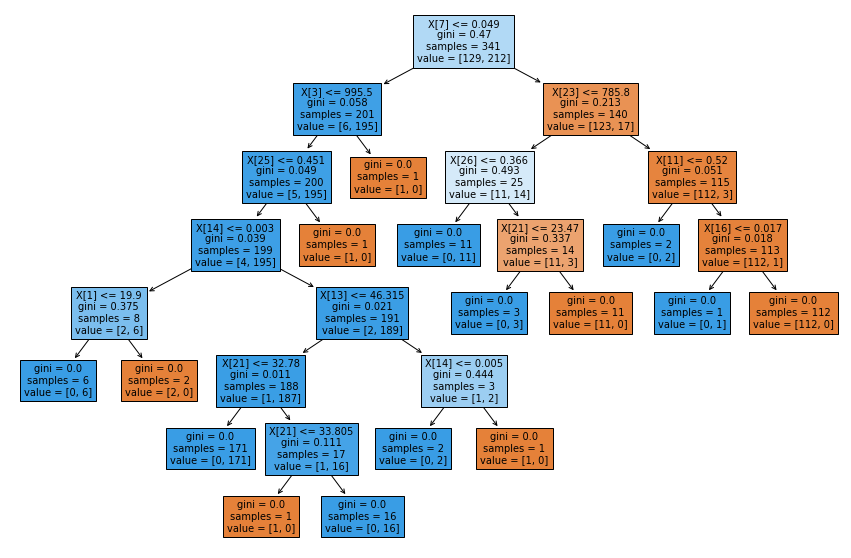

In [ ]:

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtclf,filled=True)

In [ ]:
path=dtclf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities


In [ ]:
dtclfs=[]
for ccp_alpha in  ccp_alphas:
    dtclf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    dtclf.fit(X_train,y_train)
    dtclfs.append(dtclf)

In [ ]:
train_scores = [dtclf.score(X_train, y_train) for dtclf in dtclfs]
test_scores = [dtclf.score(X_test, y_test) for dtclf in dtclfs]

In [ ]:
test_scores,ccp_alphas

([0.8947368421052632,
  0.9122807017543859,
  0.9210526315789473,
  0.9210526315789473,
  0.9254385964912281,
  0.9210526315789473,
  0.9078947368421053,
  0.881578947368421,
  0.6359649122807017],
 array([0.        , 0.00290184, 0.00563319, 0.0058132 , 0.0113231 ,
        0.01382488, 0.02230415, 0.03433417, 0.34863814]))

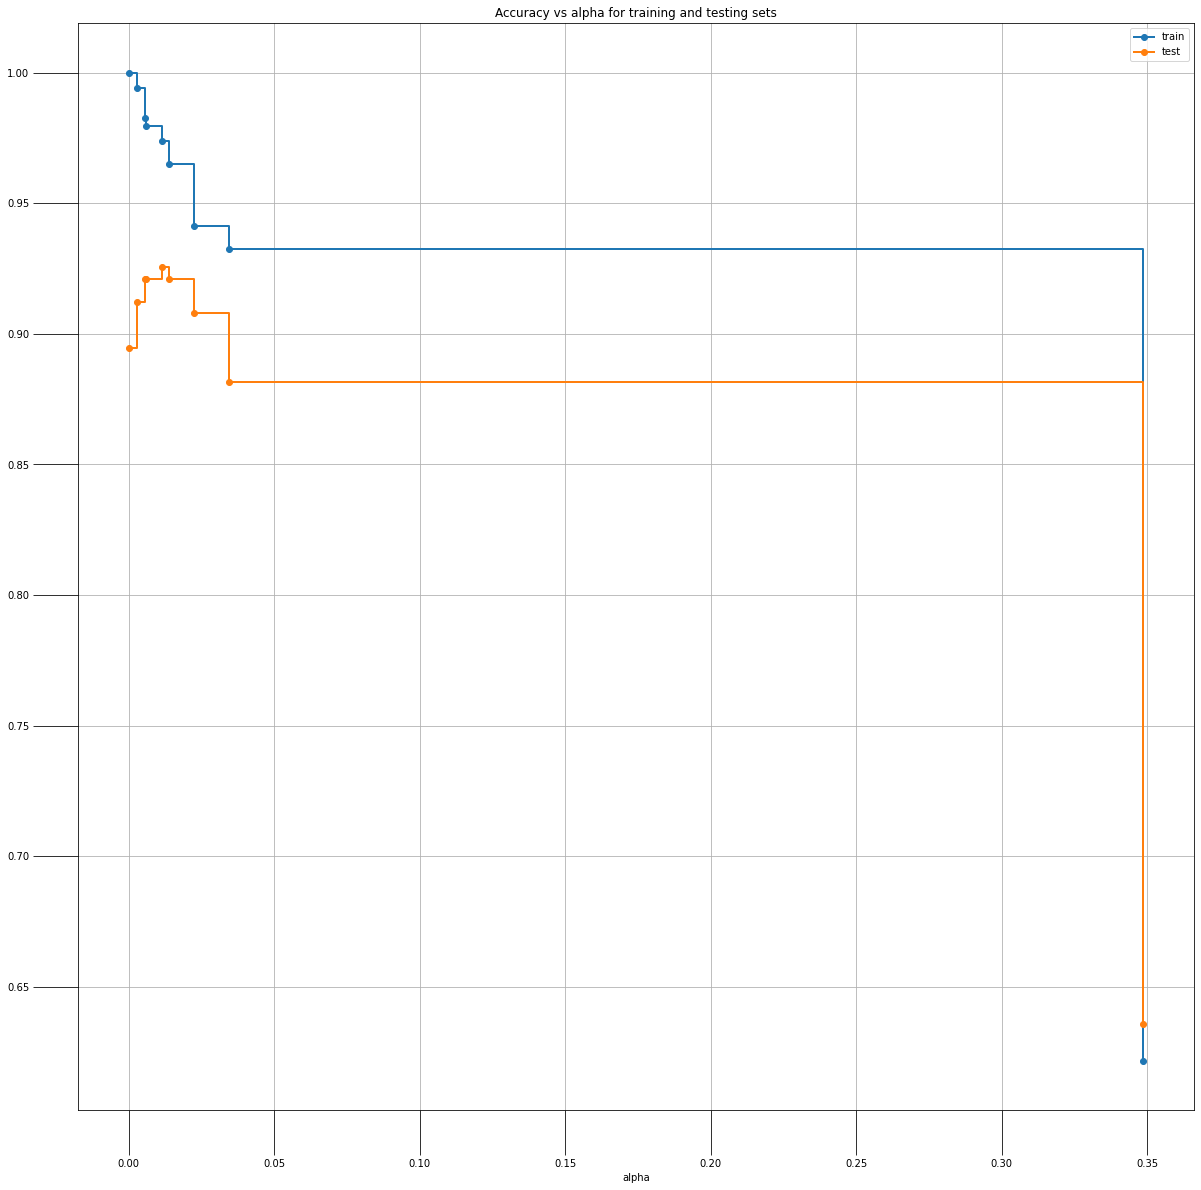

In [ ]:

fig, ax = plt.subplots()

fig.set_figheight(20)
fig.set_figwidth(20)
ax.set_xlabel("alpha")
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)
plt.grid(True)
ax.set_title("Accuracy vs alpha for training and testing sets")
plt.tick_params(length=45)
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post",linewidth=2)
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post",linewidth=2)
max_test_index = np.where(test_scores == max(test_scores))[0][0] #get the index of the maximum inflation
max_test = test_scores[max_test_index] # get the inflation corresponding to this index
ccp_max = ccp_alphas[max_test_index] # get the year corresponding to this index


ax.legend()
plt.show()

In [ ]:
max_test_index = np.where(test_scores == max(test_scores))[0][0] #get the index of the maximum inflation
max_test = test_scores[max_test_index] 
ccp_max = ccp_alphas[max_test_index]
print("ccp_alpha_max_value_for_max_test_score   ",ccp_max)

ccp_alpha_max_value_for_max_test_score    0.011323100809131435


In [ ]:
improved_dtclf=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_max)
improved_dtclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.011323100809131435, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [ ]:
accuracy_score(y_test,improved_dtclf.predict(X_test))

0.9254385964912281

[Text(334.8, 489.24, 'X[7] <= 0.049\ngini = 0.47\nsamples = 341\nvalue = [129, 212]'),
 Text(167.4, 380.52000000000004, 'gini = 0.058\nsamples = 201\nvalue = [6, 195]'),
 Text(502.20000000000005, 380.52000000000004, 'X[23] <= 785.8\ngini = 0.213\nsamples = 140\nvalue = [123, 17]'),
 Text(334.8, 271.8, 'X[26] <= 0.366\ngini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(167.4, 163.08000000000004, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(502.20000000000005, 163.08000000000004, 'X[21] <= 23.47\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(669.6, 54.360000000000014, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(669.6, 271.8, 'gini = 0.051\nsamples = 115\nvalue = [112, 3]')]

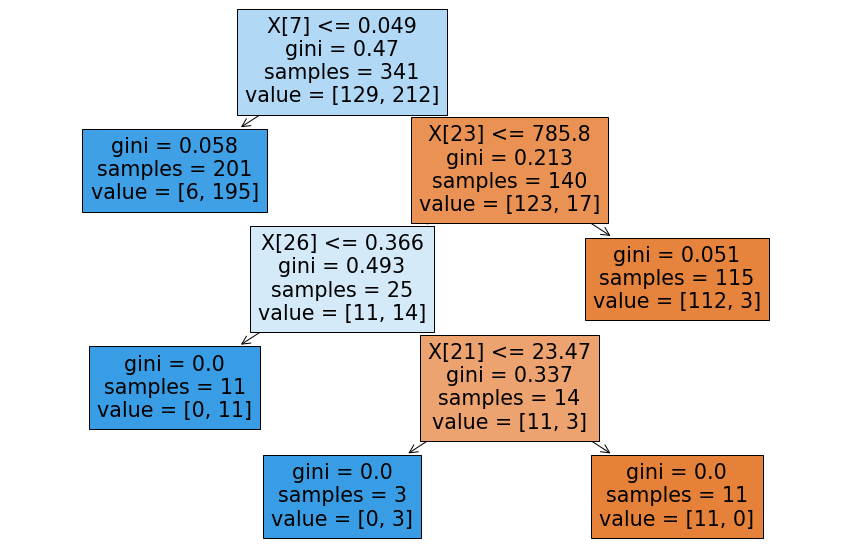

In [ ]:

plt.figure(figsize=(15,10))
tree.plot_tree(improved_dtclf,filled=True)